<a href="https://colab.research.google.com/github/GuptaRitik/car_dekho_price_prediction/blob/main/Self_Project_Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## The dependent variable is the <code>selling_price</code>. 



In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
import statsmodels.api as sm 
from sklearn.model_selection import GridSearchCV

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
# creating th dataframes from given datasets
df = pd.read_csv("/content/drive/MyDrive/DS_Almabetter /Module 4 - Machine learning/Week-1/Project/self/Copy of CAR DETAILS FROM CAR DEKHO.csv")
df2 = pd.read_csv('/content/drive/MyDrive/DS_Almabetter /Module 4 - Machine learning/Week-1/Project/self/Copy of Car details v3.csv')

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [64]:
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


#### We can remove some extra columns from this dataframe, so that we can make a clear dataset of all values merged by 2 dataframes.

In [65]:
print(df.shape)
print(df2.shape)

df2 = df2.iloc[:,:-5]  #removing the extra columns from this dataframe and preparing it fro merging with another dataframe

n_df = df.append(df2,ignore_index = True) #appending both dataframe values into one

n_df.drop_duplicates(inplace=True) # dropping the duplicates

df = n_df #changing the name for convinience

print(df.shape)

(4340, 8)
(8128, 13)
(10453, 8)


In [66]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


## Outlier Treatment for "Km driven" and "Selling price" 

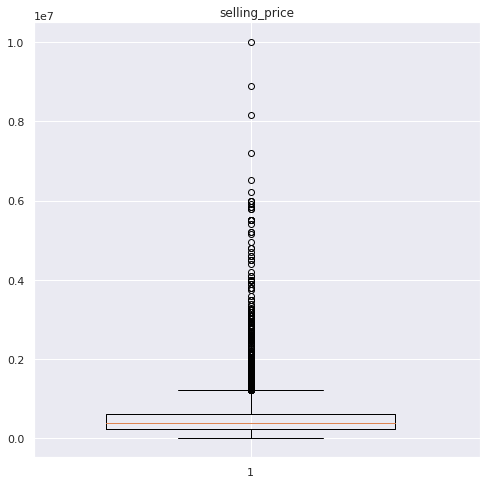

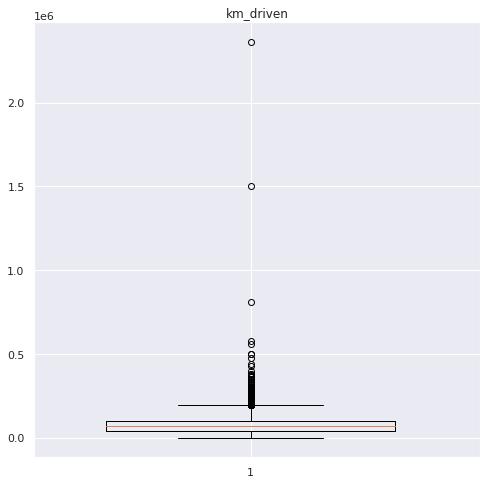

In [67]:
for i in ['selling_price', 'km_driven']:
    plt.figure(figsize =(8,8))
    plt.boxplot(df[i])
    plt.title(i)
    plt.xlim(0.888,1.119) # just zooming the boxplot
    plt.show()
    

In selling_price We observe that there are many extreme values of prices and to genralise the moel we can remove some extreme values that affect our model  

In [68]:
df = df[df['selling_price']<3000000].reset_index(drop=True)



In km_driven, as per some knowledge of cars, kilometers driven cant be more than 300000 kms for a car, because 95% car can't go further that., so we can remove the outliers of km_driven.

In [69]:
df[df['km_driven']>250000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
56,Chevrolet Tavera Neo LS B3 - 7(C) seats BSIII,2010,280000,350000,Diesel,Individual,Manual,Second Owner
508,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner
950,Tata Indica DLS,2006,85000,300000,Diesel,Individual,Manual,Second Owner
1089,Maruti Swift VXI BSIII,2009,250000,806599,Petrol,Dealer,Manual,First Owner
1483,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,2006,229999,300000,Diesel,Individual,Manual,First Owner
...,...,...,...,...,...,...,...,...
9510,Toyota Innova 2.5 V Diesel 8-seater,2008,700000,260000,Diesel,Individual,Manual,First Owner
9568,Toyota Innova 2.5 V Diesel 8-seater,2007,350000,376412,Diesel,Individual,Manual,Second Owner
9938,Mitsubishi Lancer 2.0 LXd,2000,150000,280000,Diesel,Individual,Manual,Second Owner
10005,Chevrolet Tavera Neo LT-L - 9 seats BSII,2010,285000,265000,Diesel,Individual,Manual,Fourth & Above Owner


we can remove the values that are more than 250,000 in km driven, to generalise our model without any extreme values



In [70]:
df = df[(df['km_driven']>500) & (df['km_driven']<250000)].reset_index(drop=True)


### Data wrangling and Feature Engineering  

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10285 entries, 0 to 10284
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           10285 non-null  object
 1   year           10285 non-null  int64 
 2   selling_price  10285 non-null  int64 
 3   km_driven      10285 non-null  int64 
 4   fuel           10285 non-null  object
 5   seller_type    10285 non-null  object
 6   transmission   10285 non-null  object
 7   owner          10285 non-null  object
dtypes: int64(3), object(5)
memory usage: 642.9+ KB


No null values found in data, also the data types are very well assigned without any mess

## Treatment of 'Name' column

In [72]:
df['name'].nunique()

2463

there are numerous cars in this datset which is not useful for our analysis, 
so we can get the company names from car name and use it for further analysis

In [73]:
# using the split method of string to get the first word of name which is company's name and replacing it along
df['name']=df['name'].apply(lambda x: x.split()[0]) 

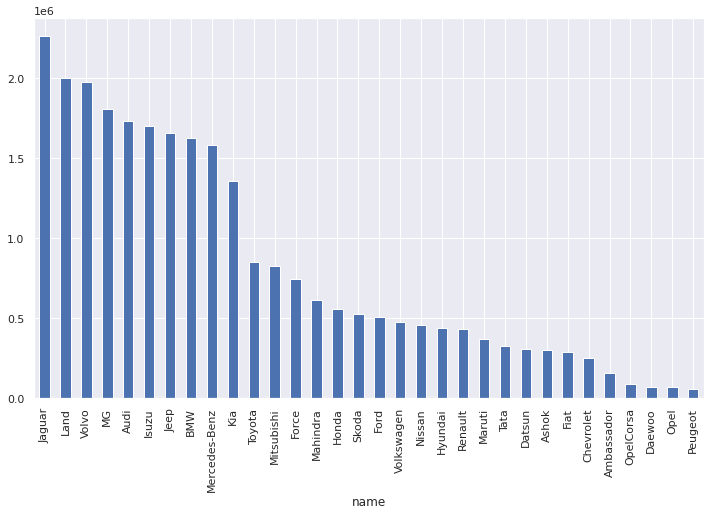

In [74]:
# plotting the average price of cars for each company

plt.figure(figsize=(12, 7))

df.groupby('name')['selling_price'].mean().sort_values(ascending=False).plot(kind='bar')

We analysed that there is variation in pricing so to leverage the company name in our model, we can make use of its average price to divide into different categories for encoding.

In [75]:
# here creating the new column of mean price of each company and adding it to the main dataframe 
df = df.merge(round(df.groupby('name')['selling_price'].mean(),3),on = 'name',how = 'left')

df.rename(columns = {'selling_price_x':'selling_price','selling_price_y':'mean_price'}, inplace = True)

In [76]:
# storing our assumption of dividing company based of the condition
co_lessthan3_5_lkh = df[df['mean_price']<=350000]['name'].unique()
co_lessthan5_lkh =df[(df['mean_price']>350000) & (df['mean_price']<500000)]['name'].unique()
co_lessthan10_lkh = df[(df['mean_price']>=500000) & (df['mean_price']<1000000)]['name'].unique()
co_above_10lkh = df[df['mean_price']>=1000000]['name'].unique()

print(f'co_lessthan3_5_lkh {co_lessthan3_5_lkh} \nco_lessthan5_lkh {co_lessthan5_lkh} \nco_lessthan10_lkh {co_lessthan10_lkh} \nco_above_10lkh {co_above_10lkh}')

co_lessthan3_5_lkh ['Datsun' 'Tata' 'Chevrolet' 'Fiat' 'Daewoo' 'OpelCorsa' 'Ambassador'
 'Ashok' 'Opel' 'Peugeot'] 
co_lessthan5_lkh ['Maruti' 'Hyundai' 'Nissan' 'Renault' 'Volkswagen'] 
co_lessthan10_lkh ['Honda' 'Toyota' 'Skoda' 'Mahindra' 'Ford' 'Mitsubishi' 'Force'] 
co_above_10lkh ['Jaguar' 'Mercedes-Benz' 'Audi' 'Jeep' 'BMW' 'Volvo' 'MG' 'Isuzu' 'Kia'
 'Land']


We have to encode the data that on basis of average price as less than 350000 is 1, less than 500000 is 2, less than 1000000 is 3 and more than that will be 4

In [77]:
df['car_category'] = df['mean_price'].apply(lambda x: 1 if x <= 350000 else 2 if x<500000 else 3 if x<1000000 else 4)

# now dropping the mean price and name columns as they are of no use now
df.drop(['name','mean_price'],axis=1, inplace=True)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_category
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,1
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,3


## Treatment of 'Year' column

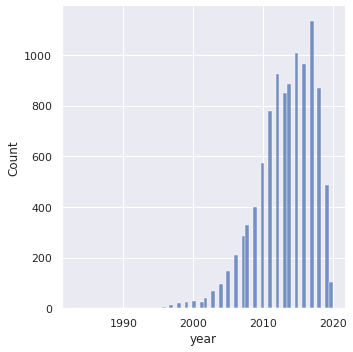

In [78]:
sns.displot(df.year)

We cant directly use the Year and pass it to the model, years have their own influence in pricing, so we can try to get the age of car from the year provided

* Assumption - 
2020 is the current year because this dataset is created on 2020

so we substract car year from current year and get the car age, that sure makes impact to a car price

In [79]:
df['car_age'] = 2020-df['year'] # substracting car ytear from current year i.e 2020
df.drop(['year'],axis=1, inplace=True) # dropping year, its not valuable for our model now.

## Treatment of 'Fuel' column

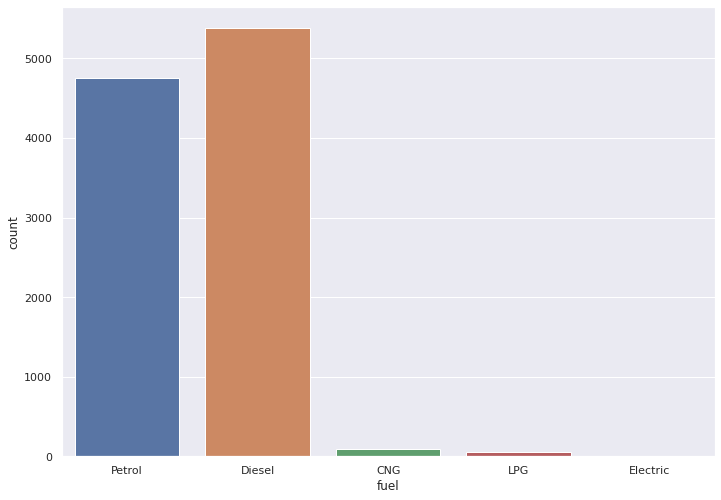

In [80]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.countplot(x ='fuel', data = df)

Values of CNG, LPG and electric are very less, hence we can put them in a "Others" category so that our our fuel will have
Petrol, Diesel and Others; further we can use it for one hot encoding.


In [81]:
df['fuel'] = df['fuel'].replace(['LPG','CNG','Electric'],'Others')
df.fuel.value_counts()

Diesel    5381
Petrol    4753
Others     151
Name: fuel, dtype: int64

Applying One hot encoding to fuel so that we have binary values of Diesel and Petrol and we can drop the Other colum so that if its neither Petrol nor Diesel then its others category.

In [82]:
df = pd.get_dummies(df, columns=['fuel']) # getting dummies and dropping the other_fuel column
df.head()

,selling_price,km_driven,seller_type,transmission,owner,car_category,car_age,fuel_Diesel,fuel_Others,fuel_Petrol
0,60000,70000,Individual,Manual,First Owner,2,13,0,0,1
1,135000,50000,Individual,Manual,First Owner,2,13,0,0,1
2,600000,100000,Individual,Manual,First Owner,2,8,1,0,0
3,250000,46000,Individual,Manual,First Owner,1,3,0,0,1
4,450000,141000,Individual,Manual,Second Owner,3,6,1,0,0


## Seller Type and Transmission

In [83]:
df['seller_type'].value_counts()

Individual          8913
Dealer              1312
Trustmark Dealer      60
Name: seller_type, dtype: int64

the values of Trustmark Dealers are very less and we can add it with the Dealer.

In [84]:
update = df['seller_type']=='Trustmark Dealer'  #storing the condition 
df.loc[update,'seller_type']= 'Dealer'   # applying the replacement on the sopecific condition

In [85]:
df['transmission'].value_counts()

Manual       9469
Automatic     816
Name: transmission, dtype: int64

Applying the one hot encoding to both the column

In [86]:
# again using k-1 column for avoid dummy variable trap
df = pd.get_dummies(df, columns=['seller_type','transmission'])
df.head(3)

,selling_price,km_driven,owner,car_category,car_age,fuel_Diesel,fuel_Others,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual
0,60000,70000,First Owner,2,13,0,0,1,0,1,0,1
1,135000,50000,First Owner,2,13,0,0,1,0,1,0,1
2,600000,100000,First Owner,2,8,1,0,0,0,1,0,1


## Owner

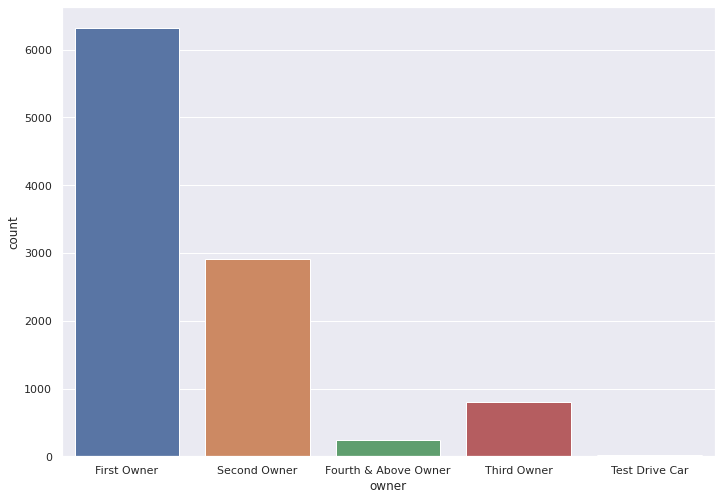

In [87]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.countplot(x='owner', data=df)

The first hand, second hand and so on itself contain a numerical weight to themselves because they are ordinal categories

In [88]:
# this category has no impact to our data, so we can remove it

df.drop(df[df['owner']=='Test Drive Car'].index, axis=0, inplace=True)

In [89]:
names = df['owner'].unique().tolist()
num = [1,2,4,3]
dic = dict(zip(names,num))
df.replace({'owner':dic},inplace=True)
df.head()

,selling_price,km_driven,owner,car_category,car_age,fuel_Diesel,fuel_Others,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual
0,60000,70000,1,2,13,0,0,1,0,1,0,1
1,135000,50000,1,2,13,0,0,1,0,1,0,1
2,600000,100000,1,2,8,1,0,0,0,1,0,1
3,250000,46000,1,1,3,0,0,1,0,1,0,1
4,450000,141000,2,3,6,1,0,0,0,1,0,1


In [90]:
#######################################################################

# Preprocessing for Model

### Checking Correlation 

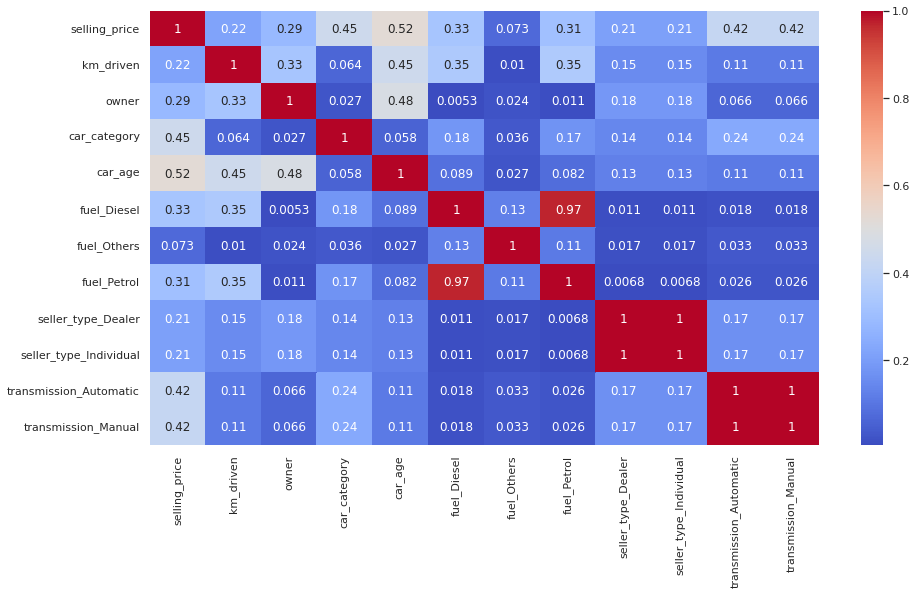

In [91]:
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

### VIF Calculation

In [92]:
def cal_vif(x):                  # definig a function to calculate vif and append it in a new datframe for each column
    vif = pd.DataFrame()
    vif['features'] = x.columns
    vif['VIF_value'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    return vif

In [93]:
iid_var = df.columns[1:]   # assigning the independent variable column name as list

cal_vif(df[iid_var])

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF_value
0,km_driven,1.599281
1,owner,1.352183
2,car_category,1.117265
3,car_age,1.601629
4,fuel_Diesel,inf
5,fuel_Others,inf
6,fuel_Petrol,inf
7,seller_type_Dealer,inf
8,seller_type_Individual,inf
9,transmission_Automatic,inf


After analysing the VIF values, we can see that the Transmission manual has VIF above 10, and to reduce it we can remove fuel_diesel column, as this column doesn't correlated to price of car.

In [94]:
df.drop('fuel_Diesel',axis=1,inplace=True) #removing the diesel
iid_var = df.columns[1:]
cal_vif(df[iid_var])

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF_value
0,km_driven,1.599281
1,owner,1.352183
2,car_category,1.117265
3,car_age,1.601629
4,fuel_Others,1.021342
5,fuel_Petrol,1.294826
6,seller_type_Dealer,inf
7,seller_type_Individual,inf
8,transmission_Automatic,inf
9,transmission_Manual,inf


## Standardising the features

In [95]:
X = df[iid_var].apply(zscore)  # applying the Z score in all the independent variables
y = np.log10(df['selling_price'])  # apply log 10 on the dependent variable

### Spliting and Training the model

In [96]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5) # splitting the training and testing data

## Model using Statsmodel.api

In [97]:
# using the stasmodel to build the model

y= y_train
x= x_train[iid_var] 
x = sm.add_constant(x) # add constant used because by default the stasmodel does not use the intercept 
est = sm.OLS(y, x).fit()
est.summary() # it gives us the total summary with scores of the model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     2679.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:40:58   Log-Likelihood:                 2721.1
No. Observations:                7189   AIC:                            -5424.
Df Residuals:                    7180   BIC:                            -5362.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.5587      0.002   2841.828      0.000       5.555       5.562
km_driven                 -0.0121      0.002     -4.966      0.000      -0.017      -0.007
owner                     -0.0189      0.002     -8.340      0.000      -0.023      -0.014
car_category               0.0940      0.002     45.507      0.000       0.090       0.098
car_age                   -0.2013      0.002    -82.887      0.000      -0.206      -0.197
fuel_Others               -0.0263      0.002    -13.594      0.000      -0.030      -0.022
fuel_Petrol               -0.0928      0.002    -41.720      0.000      -0.097      -0.088
seller_type_Dealer         0.0052      0.001      5.091      0.000       0.003       0.007
seller_type_Individual    -0.0052      0.001     -5.091      0.000      -0.007      -0.003
transmission_Automatic     0.0259      0.001     25.414      0.000       0.024       0.028
transmission_Manual       -0.0259      0.001    -25.414      0.000      -0.028      -0.024
==============================================================================
Omnibus:                      150.560   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              330.856
Skew:                           0.009   Prob(JB):                     1.43e-72
Kurtosis:                       4.051   Cond. No.                     5.86e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.63e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Model using Sklearn

In [98]:
# writing a function to get all scores at once

def test_score(actual,pred):
    
    #for RMSE
    rmse = math.sqrt(mean_squared_error(actual,pred))
    
    # for r2 score
    r2 = r2_score(actual,pred)
    
    # for adj r2
    n= len(actual)
    k= len(iid_var)
    adj_r2 = 1-(((n-1)/(n-k-1)) * (1-r2))  
    
    return rmse,r2,adj_r2



# function to calculate lasso regression with multiple parameter

def lasso_reg_scores(x_train,y_train,x,y,mx_iter=5000):

    ''' x,y are the independent and dependent variable respectively '''

    lasso_df = pd.DataFrame({'alpha':[],'RMSE':[],'R2':[],'adj_R2':[]})

    alpha_val= [0.0005,0.001,0.005,0.009,0.01,0.05]

    #runnig a loop for various alpha values and appending results of scores in dataframe along with its alpha value

    for i in alpha_val:
        model_lasso = Lasso(alpha=i,max_iter=mx_iter)
        model_lasso.fit(x_train,y_train)  # training the model with the provided variables and target
        lasso_y_pred = model_lasso.predict(x)  # predictibg values for given x as argument

        sc = test_score(10**y,10**lasso_y_pred)  # calculating the scores of the predicted data
        lasso_df = lasso_df.append({'alpha':i,'RMSE':sc[0],'R2':sc[1],'adj_R2':sc[2]},ignore_index=True)
        
    return lasso_df




# fucntion to calculate ridge with multiple parameter

def ridge_reg_scores(x_train,y_train,x,y):

    ridge_df = pd.DataFrame({'alpha':[],'RMSE':[],'R2':[],'adj_R2':[]})

    alpha_val= [2,15,20,35,45,55]

    #runnig a loop for various alpha values and appending results of scores in dataframe along with its alpha value

    for i in alpha_val:
        model_ridge = Ridge(alpha=i)
        model_ridge.fit(x_train,y_train)
        ridge_y_pred = model_ridge.predict(x)

        sc = test_score(10**y,10**ridge_y_pred)
        ridge_df = ridge_df.append({'alpha':i,'RMSE':sc[0],'R2':sc[1],'adj_R2':sc[2]},ignore_index=True)
        
    return ridge_df



## Using Sklearn Linear Regression

In [99]:
model = LinearRegression()  # fitting the model with training data
model.fit(x_train,y_train)

LinearRegression()

In [100]:
# checking r2 score on training data
model.score(x_train,y_train)

0.7490843253629724

In [101]:
# storing the predicted y for test data
y_test_pred = model.predict(x_test)

# test data scores
scores = test_score(10**y_test,10**y_test_pred)

print(f'RMSE is {scores[0]}\nr2 score is {scores[1]}\nadjusted r2 score is {scores[2]}')

RMSE is 212983.44248945016
r2 score is 0.6748371510975553
adjusted r2 score is 0.6737779887232802


## To more optimise the model we can try lasso and ridge regression

In [102]:
# executing laso on the test data and getting scores by the function we created 
lasso_reg_scores(x_train,y_train,x_test,y_test)

,alpha,RMSE,R2,adj_R2
0,0.0005,213134.402615,0.674376,0.673315
1,0.0010,213479.474901,0.673321,0.672257
2,0.0050,216931.578706,0.662670,0.661571
3,0.0090,221437.440037,0.648511,0.647366
4,0.0100,222560.686773,0.644936,0.643780
5,0.0500,275752.097889,0.454937,0.453161


We can see that our model is doing good by keeping values of alpha low as 0.0005, 0.001,0.005 then it stars to decrease the score as we increase values of alpha. 

## Estimating with Ridge Regression

In [103]:
# estimating with ridge regression on Training data

ridge_reg_scores(x_train,y_train,x_test,y_test)

,alpha,RMSE,R2,adj_R2
0,2.0,212818.062640,0.675342,0.674284
1,15.0,212871.554334,0.675179,0.674121
2,20.0,212892.494643,0.675115,0.674057
3,35.0,212956.521751,0.674919,0.673860
4,45.0,213000.199853,0.674786,0.673727
5,55.0,213044.661765,0.674650,0.673590


We can see that here also if we increase the alpha value the impact will reducing the efficieny and 5 will be optimum alpha to get best result

### In this case both the Lasso and Ridge are performing well on both the test and train data and giving approximately same scores and efficiency.

the above task can be done with Cross Validation technique which automatically finds the best parameter

## Using Cross Validation Technique

In [104]:
### Cross validation on lasso 
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-10}

Using  {'alpha': 1e-10}  the negative mean squared error is:  -0.027521250604080633


Predicting using Testing data

In [105]:
# predicting test data and checking scores 
y_test_pred_lasso = lasso_regressor.predict(x_test)

scores = test_score(10**y_test,10**y_test_pred_lasso)

print(f'RMSE is {scores[0]}\nr2 score is {scores[1]}\nadjusted r2 score is {scores[2]}')

RMSE is 212809.95636648693
r2 score is 0.6753666595549188
adjusted r2 score is 0.6743092219638924


In [106]:

### Cross validation on Ridge 
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(x_train, y_train)

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.58105e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.64681e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.58105e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.64681e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -0.027521248818994593


Predicting with Test data 

In [107]:
# predicting train data and checking scores
y_train_pred_ridge = ridge_regressor.predict(x_train)

scores = test_score(10**y_train,10**y_train_pred_ridge)

print(f'RMSE is {scores[0]}\nr2 score is {scores[1]}\nadjusted r2 score is {scores[2]}')

RMSE is 215149.82184828995
r2 score is 0.6636638014165106
adjusted r2 score is 0.6631952360799496


## We have tried several techniques to increase our accuracy, now trying a different approach towards this and let's try to fit polynomial regression and check the results

# Polynomial Regression 

In [108]:
poly = PolynomialFeatures(degree=2) #assigning instance of polynomial and taking initial degree as 2 

x_train_poly = poly.fit_transform(x_train) # fitting the x_train data to the degree

x_test_poly = poly.fit_transform(x_test) # fitting x_test data into degree

# now using linear regression we are fitting model with polynomial values of x_train 
model = LinearRegression().fit(x_train_poly,y_train)

model.score(x_train_poly,y_train) # checking score on training data

0.764229679090504

In [109]:
# predicting on test data and checking scores for polynomial reg.

y_test_pred = model.predict(x_test_poly) 

scores = test_score(10**y_test,10**y_test_pred)

print(f'RMSE is {scores[0]}\nr2 score is {scores[1]}\nadjusted r2 score is {scores[2]}')

RMSE is 204348.26710313064
r2 score is 0.7006693741798447
adjusted r2 score is 0.6996943558546975


## Again trying lasso regression with Cross validation onto this polynomial features

# CV with Lasso

In [110]:

### Cross validation on lasso 

lasso = Lasso(max_iter=15000, normalize=True)
parameters = {'alpha': [0.000001,0.0001,0.005,0.001,1]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=2)
lasso_regressor.fit(x_train_poly, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

GridSearchCV(cv=2, estimator=Lasso(max_iter=15000, normalize=True),
             param_grid={'alpha': [1e-06, 0.0001, 0.005, 0.001, 1]},
             scoring='neg_mean_squared_error')

In [111]:
# checking score of test data for cross validation technique

y_pred_lasso = lasso_regressor.predict(x_test_poly)

scores = test_score(10**y_test,10**y_pred_lasso)

print(f'RMSE is {scores[0]}\nr2 score is {scores[1]}\nadjusted r2 score is {scores[2]}')

RMSE is 204263.32254910603
r2 score is 0.7009181770903377
adjusted r2 score is 0.6999439691981237


## CV with Ridge

In [112]:

### Cross validation on Ridge 
ridge = Ridge()
parameters = {'alpha': [0.0001,0.005,0.1,1,3,5,7,10]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=2)
ridge_regressor.fit(x_train_poly, y_train)

GridSearchCV(cv=2, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.005, 0.1, 1, 3, 5, 7, 10]},
             scoring='neg_mean_squared_error')

In [113]:
#  prediction test data and checking score

y_pred_ridge = ridge_regressor.predict(x_test_poly)

scores = test_score(10**y_test,10**y_pred_ridge)

print(f'RMSE is {scores[0]}\nr2 score is {scores[1]}\nadjusted r2 score is {scores[2]}')

RMSE is 204267.12319741424
r2 score is 0.7009070471881587
adjusted r2 score is 0.6999328030421917


## CV with ElasticNet

In [114]:
# Cross validartion on elasticnet

elastic = ElasticNet()
parameters = {'alpha': [1e-3,1e-2,1e-1,1,5],'l1_ratio':[0.3,0.4,0.5]}  # elastic net takes 2 parameters that are given in dictiuonary
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=2)
elastic_regressor.fit(x_train_poly, y_train)

print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.3}

Using  {'alpha': 0.001, 'l1_ratio': 0.3}  the negative mean squared error is:  -0.026123963694568198


In [115]:
y_pred_elastic = elastic_regressor.predict(x_test_poly)

scores = test_score(10**y_test,10**y_pred_elastic)

print(f'RMSE is {scores[0]}\nr2 score is {scores[1]}\nadjusted r2 score is {scores[2]}')

RMSE is 204240.25715554773
r2 score is 0.7009857178546794
adjusted r2 score is 0.7000117299649553


# Conclusion:-

We statistically proved that Car prices depends on numerous factors which are not given to us in this dataset, they most likely to be technical aspects of car which are not covered in this data, this is just overview and we have achieved a approx 70% accuracy in it using only linear regression model with help of polynomial features.

We found some interesting insights, going through this cardekho dataset

* Kms driven have less correlation on car price.
* Age of the car is a factor that influence car pricing.
* car companies are one of the important feature for pricing.
* Automatic cars have high resale value.
